## Import Libraries and Data

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [37]:
path = r'C:\Users\sstorer\OneDrive\ML Specialization'

In [38]:
climate = pd.read_csv(os.path.join(path, 'Data Sets', 'weather_cleaned.csv'))

In [39]:
pleasantweather = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [40]:
climate.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  STOCKHOLM_temp_max  \
0            10.9                     1  ...                 4.9   
1            10.1                     6  ...                 5.0   
2             9.9                     6  ...                 4.1   
3            10.6                     8  ...                 2.3   
4             6.0                     8  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 135 columns]

In [41]:
pleasantweather.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [42]:
climate['DATE'] = pleasantweather['DATE']

In [43]:
climate.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  VALENTIA_cloud_cover  \
0            10.9                     1  ...                     5   
1            10.1                     6  ...                     7   
2             9.9                     6  ...                     7   
3            10.6                     8  ...                     7   
4             6.0                     8  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0.34                4.7                 8.5   
1                    0.84                0.7                 8.9   
2                    0.08                0.1                10.5   
3                    0.98                0.0                 7.4   
4                    0.00                5.7                 5.7   

   VALENTIA_temp_min  VALENTIA_temp_max      DATE  
0                6.0               10.9  19600101  
1                5.6               12.1  19600102  
2                8.1               12.9  19600103  
3                7.3               10.6  19600104  
4                3.0                8.4  19600105  

[5 rows x 136 columns]

## Data Wrangling

In [45]:
# Reduce observations dataset to 2010's to reduce model runtime

climate2010s = climate[(climate['DATE'].astype(str).str[:4] >= '2010') & (climate['DATE'].astype(str).str[:4] <= '2019')]
climate2010s

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263                  8            0.93          0.9965   
18264                  3            0.74          1.0193   
18265                  3            0.75          1.0226   
18266                  5            0.83          1.0169   
18267                  7            0.78          1.0073   
...                  ...             ...             ...   
21910                  8            0.92          1.0273   
21911                  7            0.86          1.0380   
21912                  6            0.93          1.0387   
21913                  1            0.81          1.0354   
21914                  5            0.87          1.0350   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   
...                       ...                  ...             ...   
21910                    0.15                 0.52             0.1   
21911                    0.35                 0.00             1.3   
21912                    0.61                 0.00             4.9   
21913                    0.64                 0.00             6.5   
21914                    0.58                 0.00             3.5   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   
18264             -1.5            -4.2             0.4                     8   
18265             -3.2            -6.0             1.1                     7   
18266             -4.9            -8.3            -3.1                     2   
18267             -4.0            -7.1            -1.5                     6   
...                ...             ...             ...                   ...   
21910              6.8             5.6             7.9                     5   
21911              3.7            -0.6             5.7                     8   
21912             -0.8            -2.7             2.6                     8   
21913              0.5            -3.0             5.1                     6   
21914              0.4            -1.3             3.5                     2   

       ...  VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
18263  ...                     1               0.80             1.0121   
18264  ...                     1               0.82             1.0196   
18265  ...                     4               0.71             1.0196   
18266  ...                     2               0.67             1.0219   
18267  ...                     4               0.78             1.0117   
...    ...                   ...                ...                ...   
21910  ...                     5               0.82             1.0142   
21911  ...                     5               0.82             1.0142   
21912  ...                     5               0.82             1.0142   
21913  ...                     5               0.82             1.0142   
21914  ...                     5               0.82             1.0142   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
18263                       0.43                    0.00                6.0   
18264                       0.45                    0.00                6.0   
18265                       0.36                    0.41                1.6   
18266                       0.48                    0.51                6.5   
18267                       0.45                    0.09                4.7   
...                          ...                     ...                ...   
21910                       0.04          

In [46]:
# Reduce pleasantweather dataset to 2010's

pleasant2010s = pleasantweather[(pleasantweather['DATE'].astype(str).str[:4] >= '2010') & (pleasantweather['DATE'].astype(str).str[:4] <= '2019')]
pleasant2010s

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   
...         ...                     ...                        ...   
21910  20191227                       0                          0   
21911  20191228                       0                          0   
21912  20191229                       0                          0   
21913  20191230                       0                          0   
21914  20191231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0    

In [58]:
climate2010s.shape

(3652, 136)

In [60]:
# Drop unnecessary columns

climate2010s.drop(['DATE'], axis=1, inplace=True)

In [62]:
climate2010s.shape

(3652, 135)

In [64]:
pleasant2010s.drop(['DATE'], axis=1, inplace=True)

In [66]:
pleasant2010s.shape

(3652, 15)

In [68]:
X = climate2010s

In [70]:
y = pleasant2010s

In [72]:
# Turn X and y from dataframes to arrays

X = np.array(X)
y = np.array(y)

## Split Data into Testing and Training Sets

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

## Random Forest Model

In [78]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5947426067907996


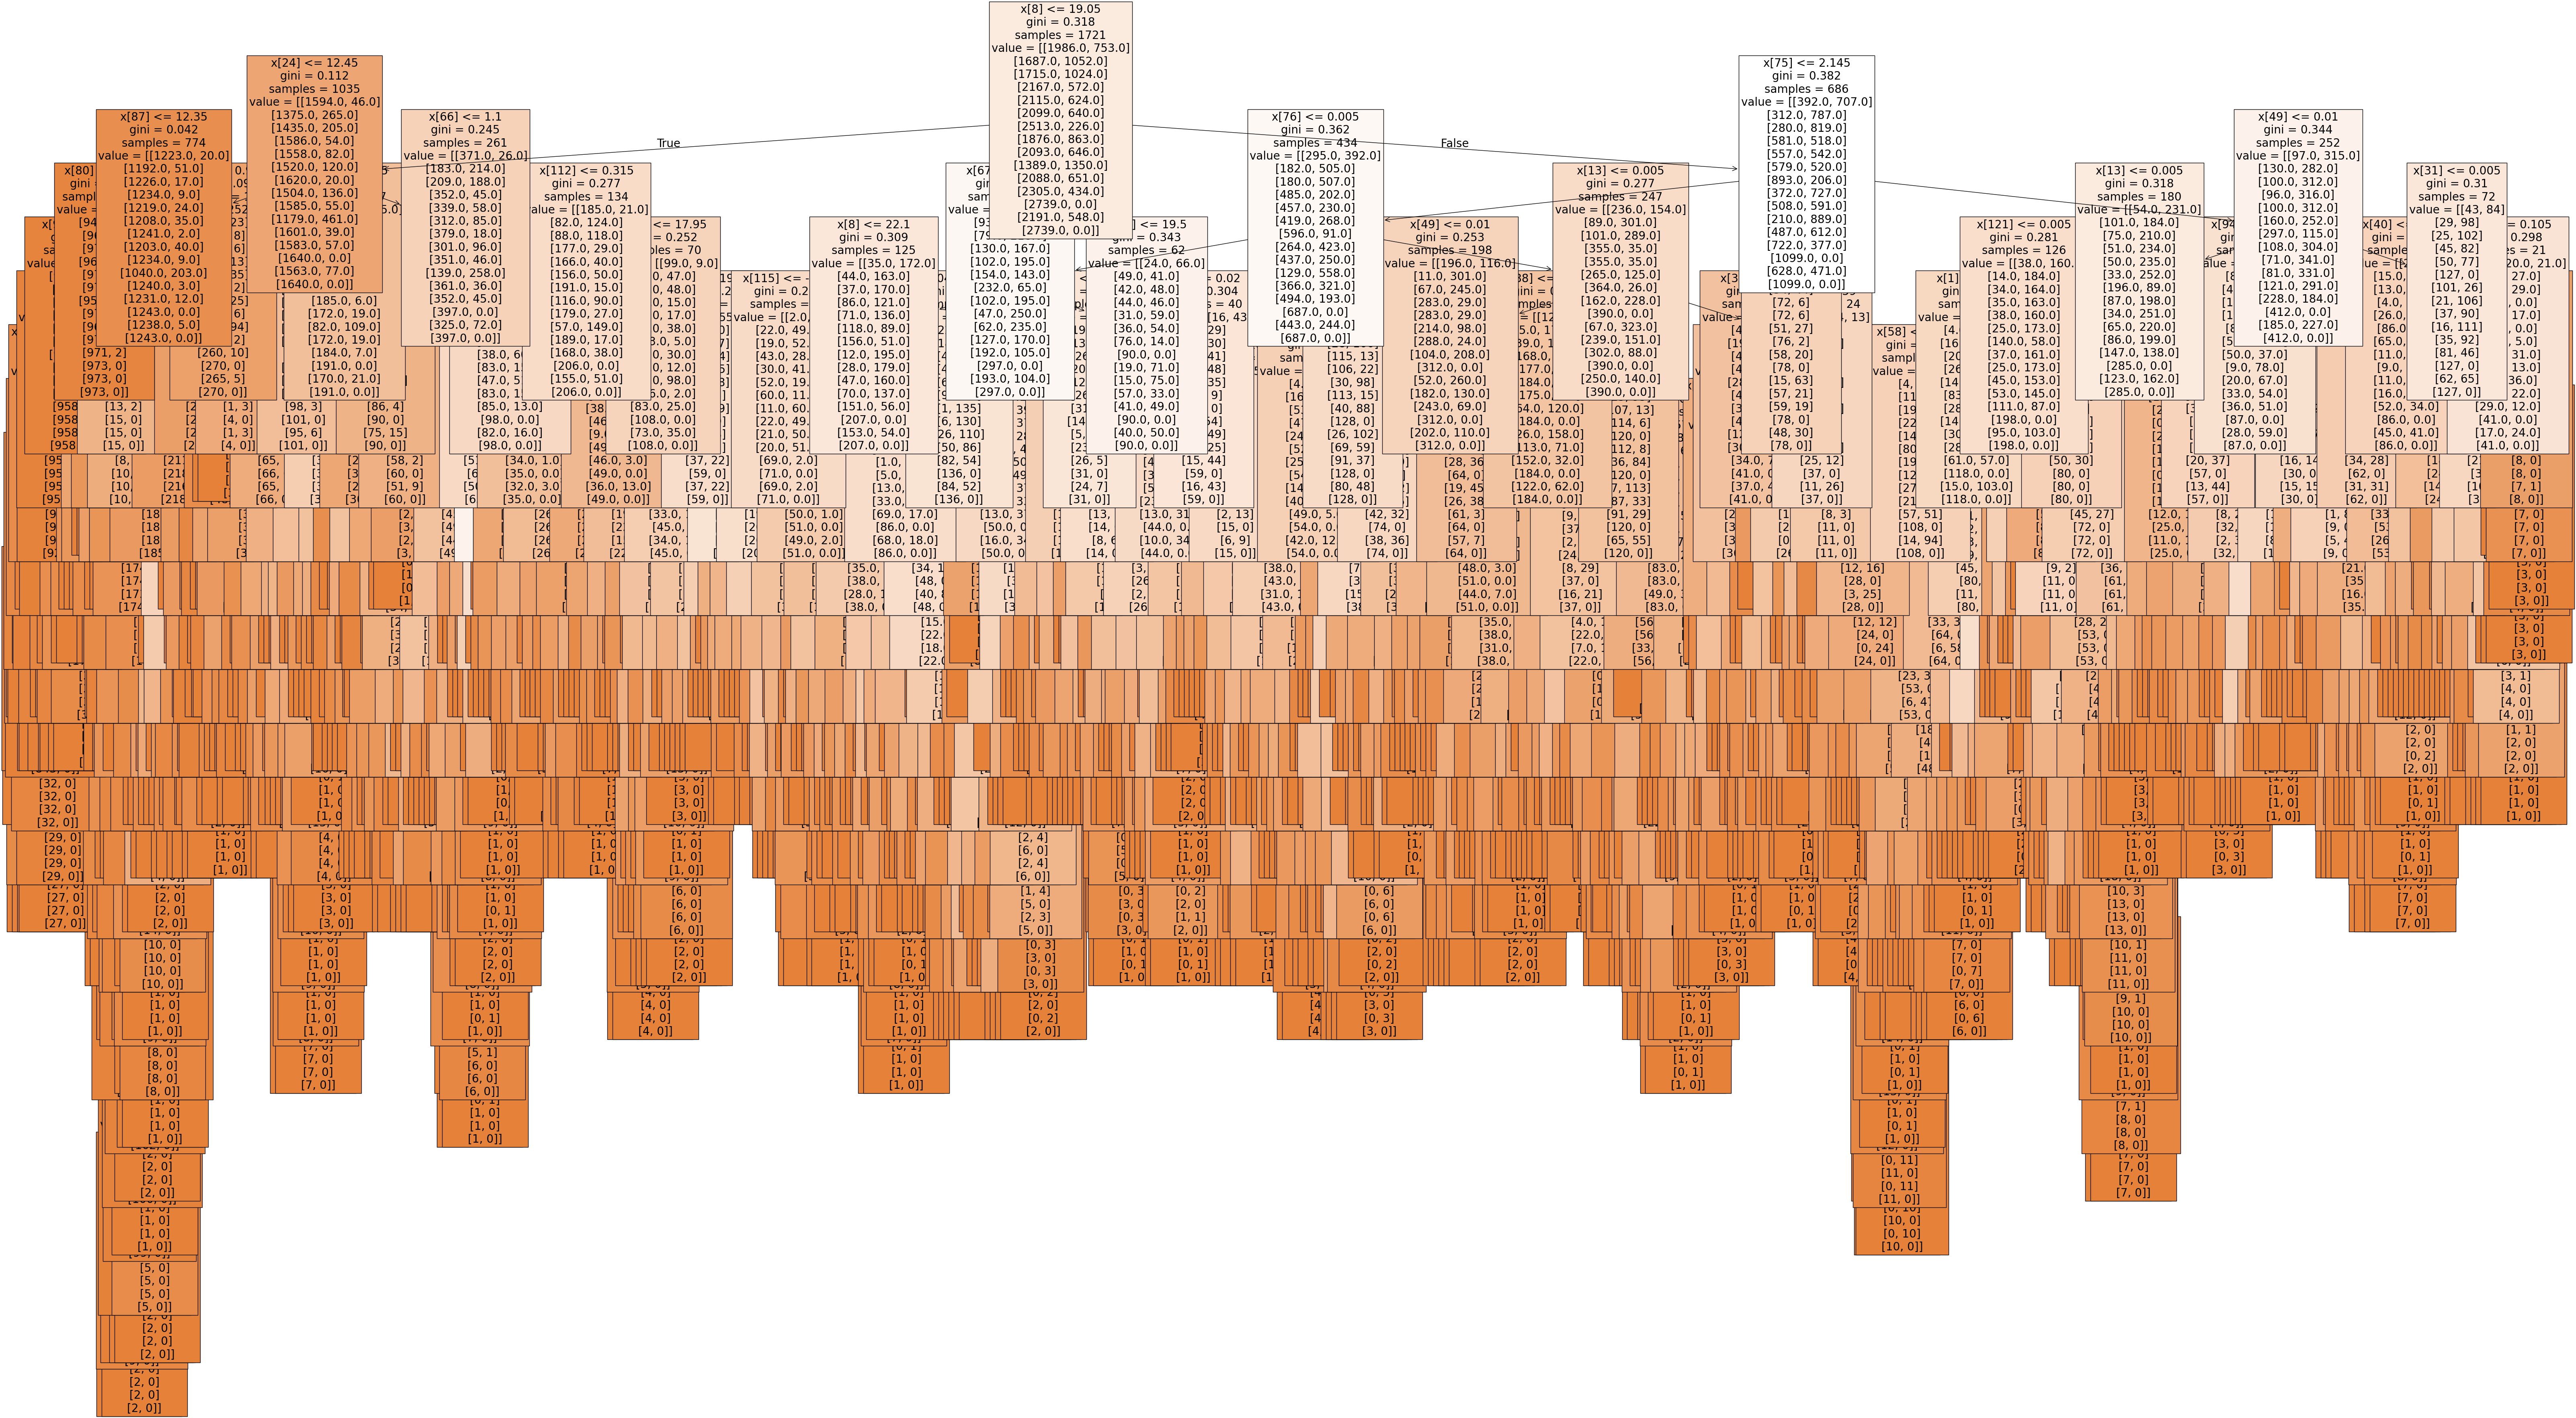

In [82]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [84]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([3.66986377e-03, 3.58022406e-03, 3.44468848e-03, 3.65600209e-03,
       2.12322963e-02, 1.06664020e-02, 1.61500821e-02, 5.38010075e-03,
       3.67233050e-02, 3.73282773e-03, 3.84920710e-03, 3.98770833e-03,
       2.77215461e-03, 1.76145308e-02, 4.41067670e-03, 7.65849701e-03,
       6.89692109e-03, 6.30080434e-03, 3.37945542e-04, 0.00000000e+00,
       0.00000000e+00, 1.40739316e-03, 1.44228924e-02, 1.33994097e-03,
       1.80860608e-02, 3.31973365e-03, 2.37346107e-02, 2.56118203e-03,
       3.18366573e-03, 5.16123929e-03, 4.34252199e-03, 1.39598264e-02,
       4.98118535e-03, 1.47648132e-02, 3.10996766e-03, 2.91097349e-02,
       2.53172691e-03, 3.05456508e-03, 4.10967871e-03, 5.75428579e-03,
       2.03440996e-02, 8.26412672e-03, 2.19836931e-02, 3.01105449e-03,
       4.16847550e-02, 2.75798984e-03, 4.18860623e-03, 3.76183410e-03,
       5.72387715e-03, 8.76192357e-03, 4.34743578e-03, 8.03301056e-03,
       3.01814793e-03, 2.28916929e-02, 2.95377645e-03, 2.59078385e-03,
      

In [86]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.66986377e-03, 3.58022406e-03, 3.44468848e-03, 3.65600209e-03,
         2.12322963e-02, 1.06664020e-02, 1.61500821e-02, 5.38010075e-03,
         3.67233050e-02],
        [3.73282773e-03, 3.84920710e-03, 3.98770833e-03, 2.77215461e-03,
         1.76145308e-02, 4.41067670e-03, 7.65849701e-03, 6.89692109e-03,
         6.30080434e-03],
        [3.37945542e-04, 0.00000000e+00, 0.00000000e+00, 1.40739316e-03,
         1.44228924e-02, 1.33994097e-03, 1.80860608e-02, 3.31973365e-03,
         2.37346107e-02],
        [2.56118203e-03, 3.18366573e-03, 5.16123929e-03, 4.34252199e-03,
         1.39598264e-02, 4.98118535e-03, 1.47648132e-02, 3.10996766e-03,
         2.91097349e-02],
        [2.53172691e-03, 3.05456508e-03, 4.10967871e-03, 5.75428579e-03,
         2.03440996e-02, 8.26412672e-03, 2.19836931e-02, 3.01105449e-03,
         4.16847550e-02],
        [2.75798984e-03, 4.18860623e-03, 3.76183410e-03, 5.72387715e-03,
         8.76192357e-03, 4.34743578e-03, 8.03301056e-03, 3.01814793

In [88]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.10450296, 0.05722333, 0.06264858, 0.08117414, 0.11073799,
       0.06348452, 0.03020487, 0.07315896, 0.10102066, 0.06037574,
       0.09838889, 0.05736121, 0.03400195, 0.06140446, 0.00431176])

In [92]:
# Extract stations list

stations = [col.split('_')[0] for col in climate2010s.columns if '_' in col]

In [94]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [96]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [98]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

MUNCHENB      0.110738
MAASTRICHT    0.104503
BASEL         0.101021
DUSSELDORF    0.098389
OSLO          0.081174
VALENTIA      0.073159
HEATHROW      0.063485
LJUBLJANA     0.062649
BUDAPEST      0.061404
BELGRADE      0.060376
STOCKHOLM     0.057361
DEBILT        0.057223
MADRID        0.034002
SONNBLICK     0.030205
KASSEL        0.004312
dtype: float64

In [100]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['MAASTRICHT', 'DEBILT', 'LJUBLJANA', 'OSLO', 'MUNCHENB', 'HEATHROW', 'SONNBLICK', 'VALENTIA', 'BASEL', 'BELGRADE', 'DUSSELDORF', 'STOCKHOLM', 'MADRID', 'BUDAPEST', 'KASSEL']


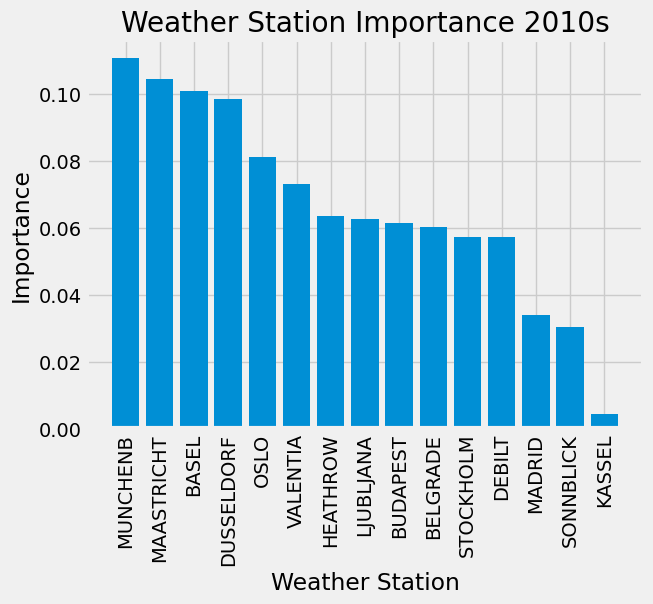

In [104]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')

plt.show()

## Data Wrangling (MUNCHENB Model)

In [111]:
# Create a list of the columns containing "Munchenb" in their names

munchenb_list = [col for col in climate.columns if 'MUNCHENB' in col]
munchenb_list

['MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_pressure',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max']

In [113]:
# Create a dataframe with those columns

df_munchenb = climate[munchenb_list]
df_munchenb

MUNCHENB_cloud_cover  MUNCHENB_humidity  MUNCHENB_pressure  \
0                         5               0.67             1.0304   
1                         6               0.72             1.0292   
2                         6               0.91             1.0320   
3                         6               0.90             1.0443   
4                         5               0.85             1.0430   
...                     ...                ...                ...   
22945                     2               0.76             1.0263   
22946                     6               0.70             1.0263   
22947                     7               0.64             1.0263   
22948                     6               0.75             1.0263   
22949                     5               0.83             1.0263   

       MUNCHENB_global_radiation  MUNCHENB_precipitation  MUNCHENB_sunshine  \
0                           0.20                    0.10                0.0   
1                           0.61                    0.30                5.1   
2                           0.20                    0.30                0.0   
3                           0.20                    0.01                0.0   
4                           0.65                    0.96                5.6   
...                          ...                     ...                ...   
22945                       1.37                    0.26                9.7   
22946                       1.37                    0.26                7.7   
22947                       1.37                    0.26                6.8   
22948                       1.37                    0.26                8.3   
22949                       1.37                    0.26                6.8   

       MUNCHENB_temp_mean  MUNCHENB_temp_min  MUNCHENB_temp_max  
0                     6.9                1.1               10.4  
1                     6.2                4.2               10.2  
2                     5.8                4.0                8.0  
3                     3.9                3.2                5.4  
4                     1.8               -3.0                6.0  
...                   ...                ...                ...  
22945                14.3                8.3               22.2  
22946                16.1                8.9               26.1  
22947                17.4               11.2               26.2  
22948                14.5                9.2               23.5  
22949                12.9                7.9               19.6  

[22950 rows x 9 columns]

In [115]:
# Reduce answers dataset to Munchenb's answers only

pleasant_munchenb = pleasantweather['MUNCHENB_pleasant_weather']
pleasant_munchenb

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MUNCHENB_pleasant_weather, Length: 22950, dtype: int64

In [117]:
X2 = df_munchenb

In [119]:
y2 = pleasant_munchenb

In [121]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [123]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

## Random Forest Model (MUNCHENB)

In [126]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [128]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


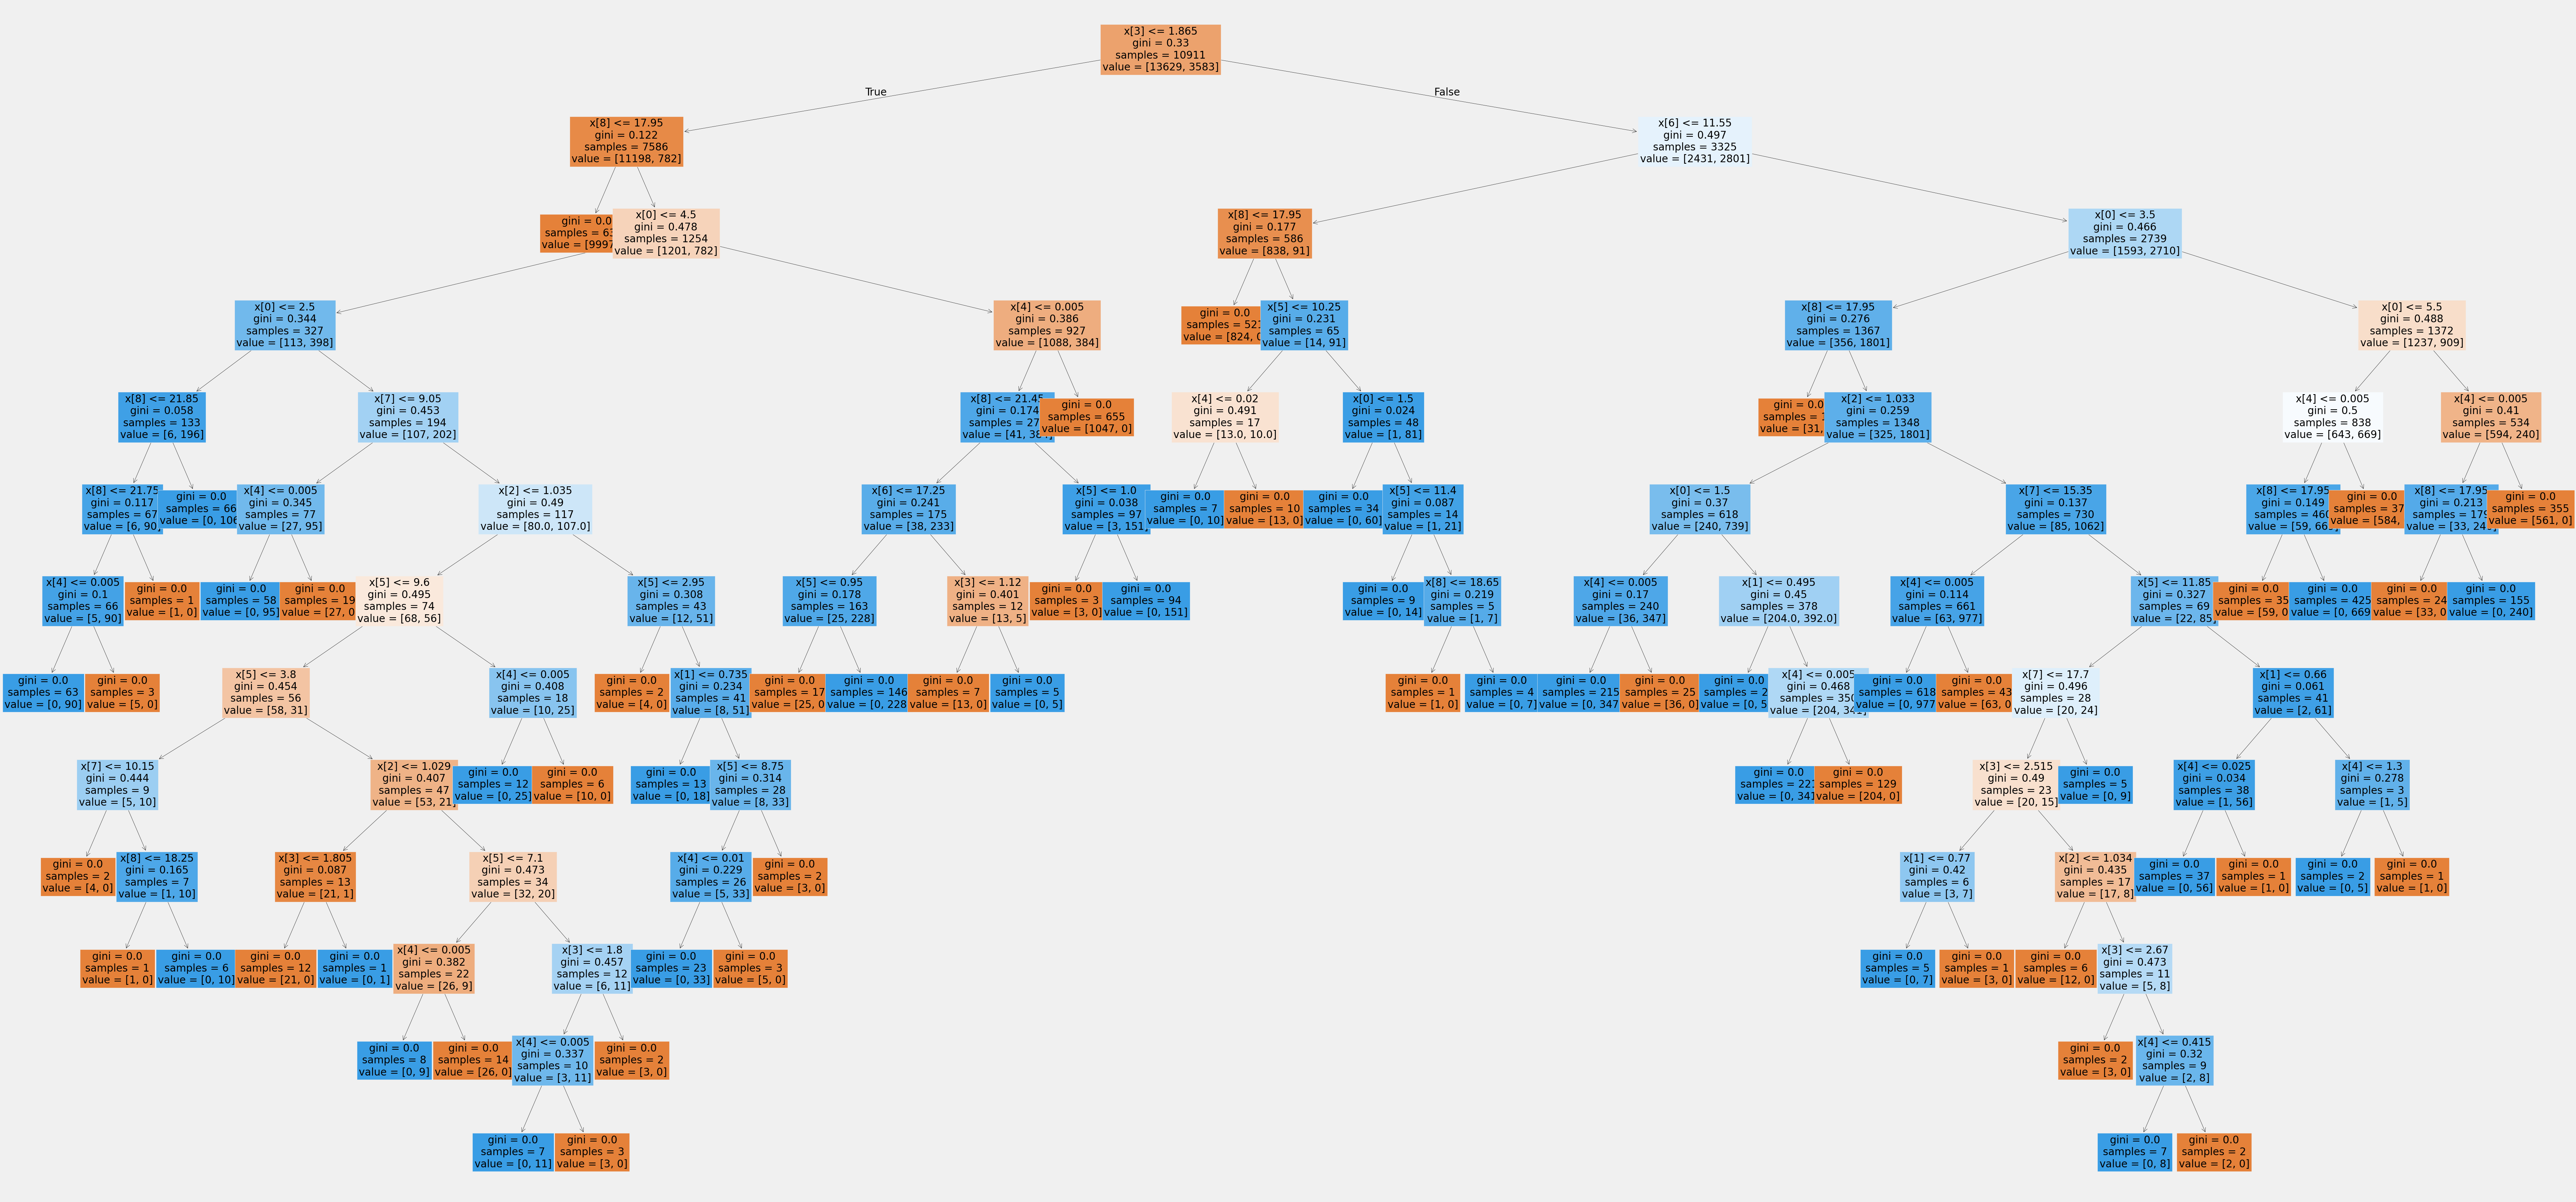

In [130]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [132]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.03188598, 0.01286497, 0.01142243, 0.04736116, 0.37892608,
       0.08174676, 0.13127024, 0.03268737, 0.27183501])

In [134]:
# Create a list of weather features

wx_list = [feature.replace('MUNCHENB_', '') for feature in munchenb_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [136]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.031886
humidity            0.012865
pressure            0.011422
global_radiation    0.047361
precipitation       0.378926
sunshine            0.081747
temp_mean           0.131270
temp_min            0.032687
temp_max            0.271835
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


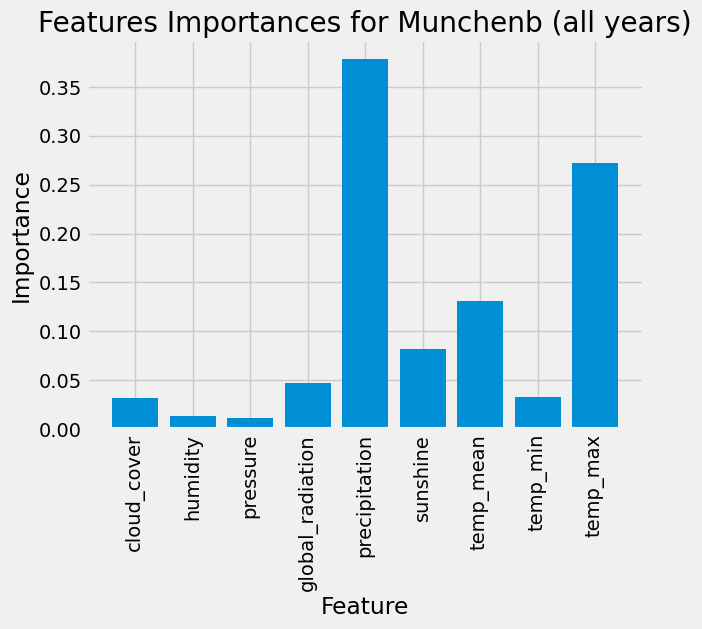

In [140]:
# Plot the results

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Munchenb (all years)');

plt.show()

## Data Wrangling (MAASTRICHT Model)

In [143]:
# Create a list of the columns containing "Maastricht" in their names

maastricht_list = [col for col in climate.columns if 'MAASTRICHT' in col]
maastricht_list

['MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max']

In [145]:
# Create a dataframe with those columns

df_maastricht = climate[maastricht_list]
df_maastricht

MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                           7                 0.83               1.0063   
1                           8                 0.92               1.0062   
2                           7                 0.97               1.0167   
3                           7                 0.89               1.0277   
4                           7                 0.92               1.0259   
...                       ...                  ...                  ...   
22945                       8                 0.67               1.0201   
22946                       7                 0.70               1.0190   
22947                       8                 0.69               1.0183   
22948                       8                 0.73               1.0181   
22949                       8                 0.80               1.0160   

       MAASTRICHT_global_radiation  MAASTRICHT_precipitation  \
0                             0.22                      0.32   
1                             0.17                      1.34   
2                             0.12                      0.46   
3                             0.16                      0.00   
4                             0.12                      0.56   
...                            ...                       ...   
22945                         1.17                      0.20   
22946                         1.17                      0.20   
22947                         1.17                      0.20   
22948                         1.17                      0.20   
22949                         1.17                      0.20   

       MAASTRICHT_sunshine  MAASTRICHT_temp_mean  MAASTRICHT_temp_min  \
0                      1.0                   9.5                  8.5   
1                      0.4                   8.6                  7.5   
2                      0.0                   6.9                  5.5   
3                      0.3                   7.0                  3.0   
4                      0.0                   8.1                  2.5   
...                    ...                   ...                  ...   
22945                  5.3                  18.6                 14.1   
22946                  5.0                  18.9                 15.8   
22947                  3.2                  18.2                 13.7   
22948                  6.8                  16.3                 12.8   
22949                  3.0                  15.3                 11.0   

       MAASTRICHT_temp_max  
0                     11.1  
1                      9.9  
2                      9.9  
3                     10.0  
4                     11.1  
...                    ...  
22945                 22.6  
22946                 23.5  
22947                 24.3  
22948                 21.4  
22949                 19.4  

[22950 rows x 9 columns]

In [147]:
# Reduce answers dataset to Munchenb's answers only

pleasant_maastricht = pleasantweather['MAASTRICHT_pleasant_weather']
pleasant_maastricht

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MAASTRICHT_pleasant_weather, Length: 22950, dtype: int64

In [149]:
X3 = df_maastricht

In [151]:
y3 = pleasant_maastricht

In [153]:
# Turn X3 and y3 from df to arrays

X = np.array(X3)
y = np.array(y3)

In [155]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

## Random Forest Model (MAASTRICHT)

In [158]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [160]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


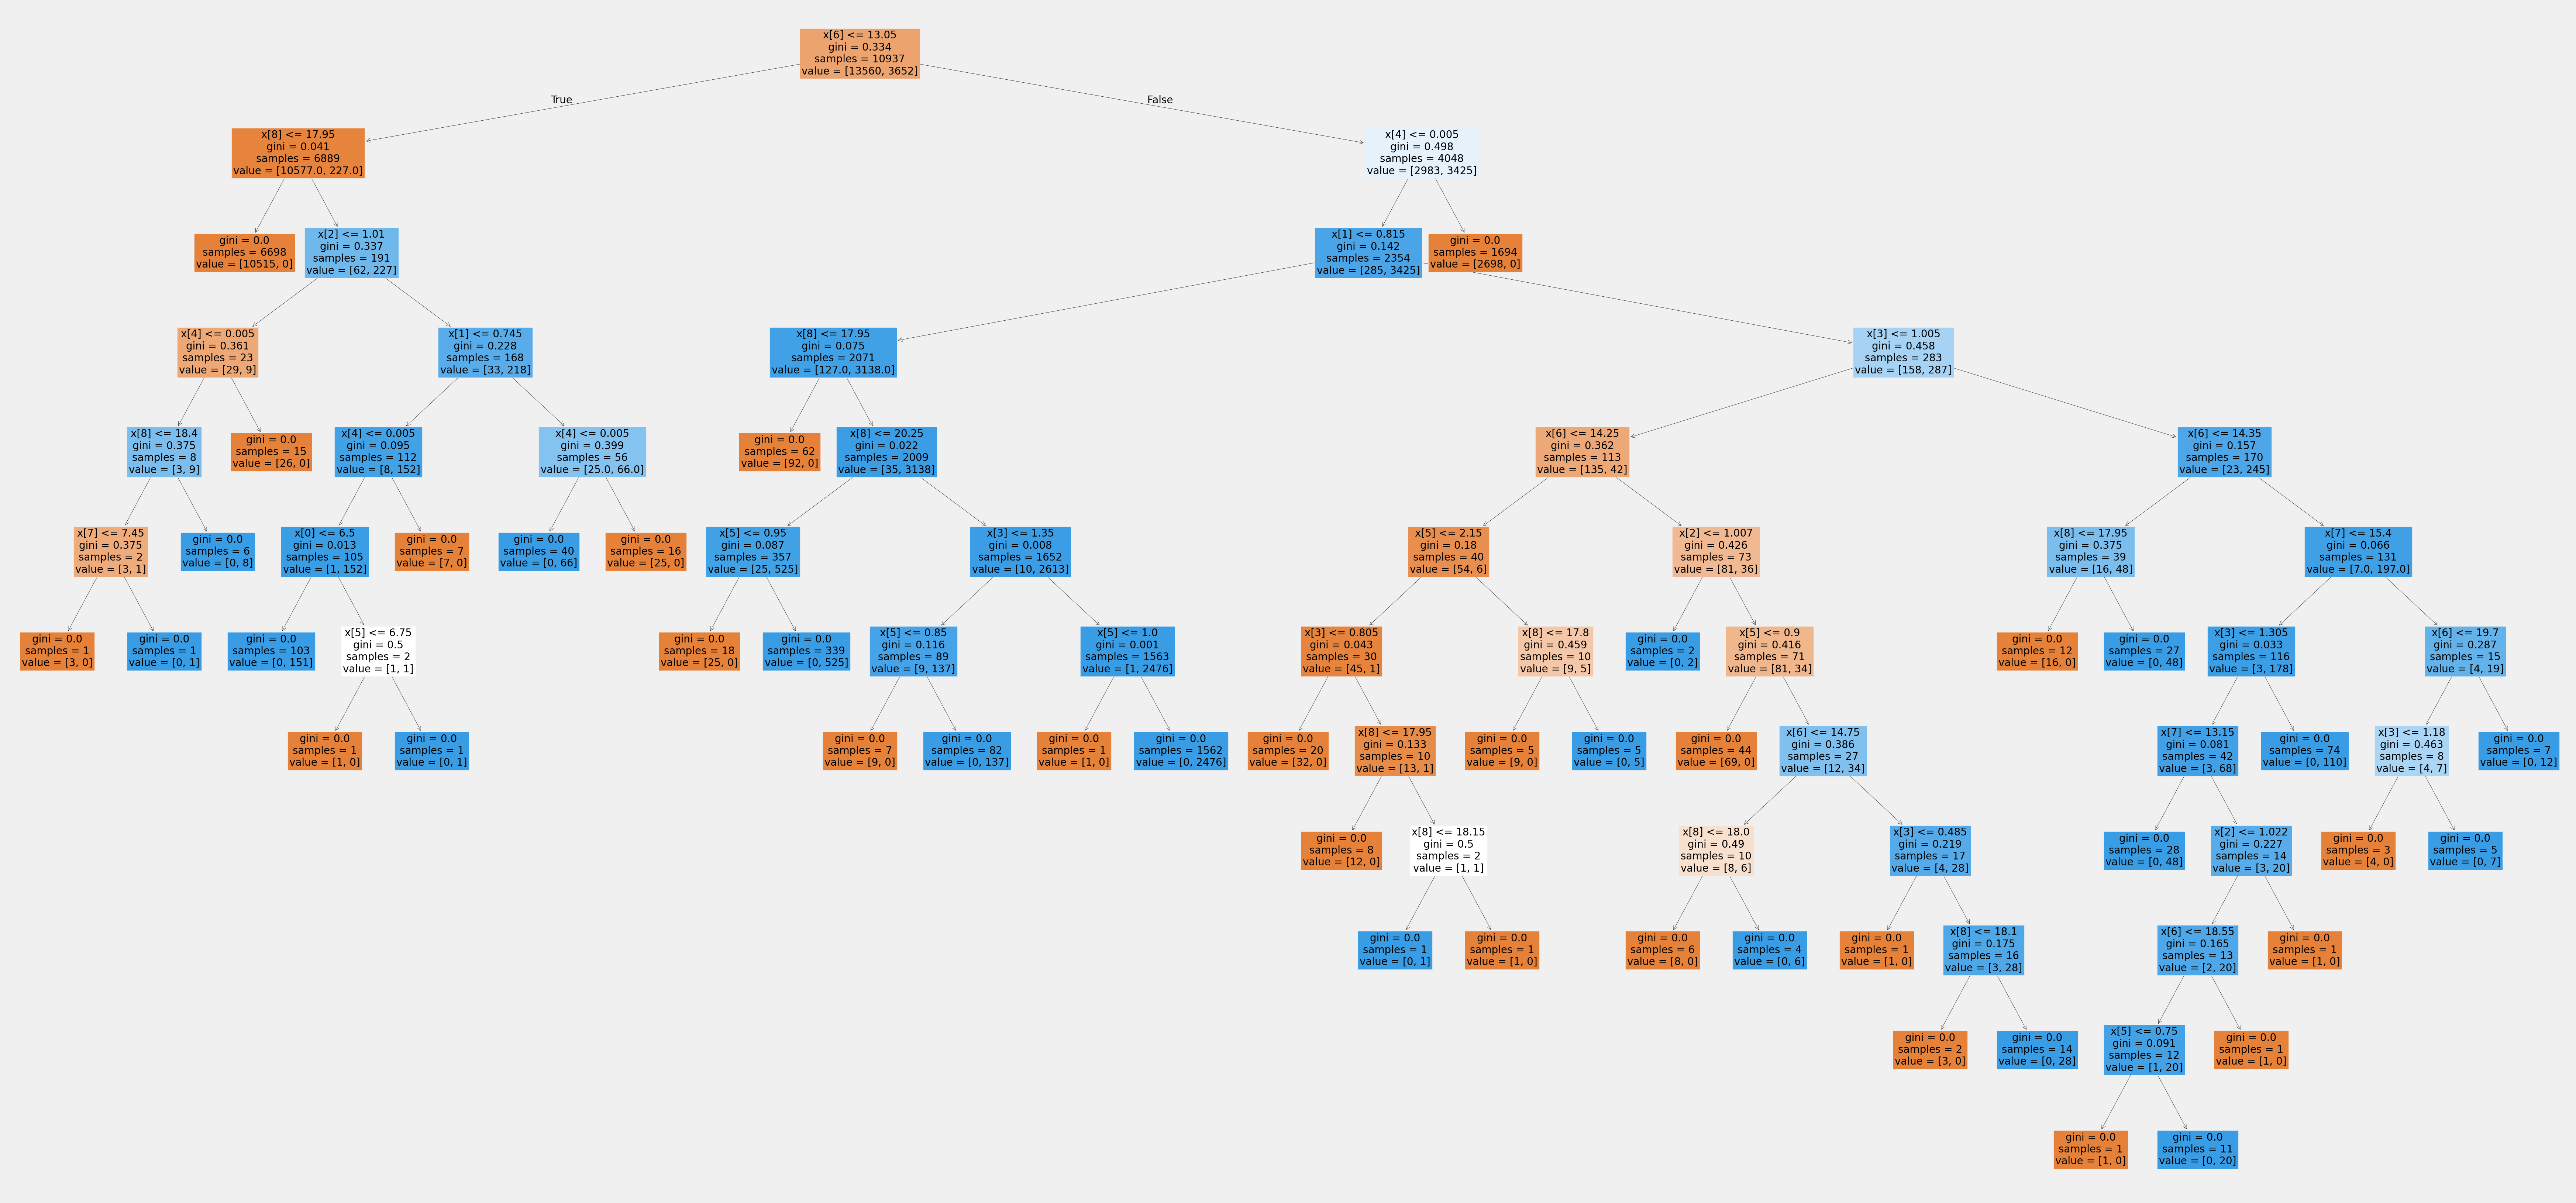

In [162]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [164]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.03342011, 0.0234849 , 0.01524519, 0.08536527, 0.32160391,
       0.07055843, 0.11818052, 0.02465301, 0.30748866])

In [166]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.033420
humidity            0.023485
pressure            0.015245
global_radiation    0.085365
precipitation       0.321604
sunshine            0.070558
temp_mean           0.118181
temp_min            0.024653
temp_max            0.307489
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


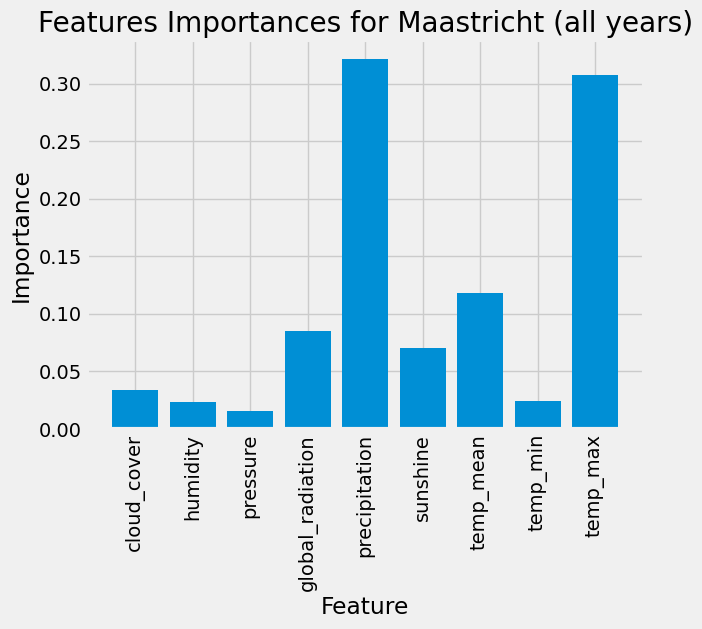

In [168]:
# Plot the results

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Maastricht (all years)');

plt.show()

## Data Wrangling (BASEL Model)

In [171]:
# Create a list of the columns containing "Basel" in their names

basel_list = [col for col in climate.columns if 'BASEL' in col]
basel_list

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [173]:
# Create a dataframe with those columns

df_basel = climate[basel_list]
df_basel

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                      7            0.85          1.0180   
1                      6            0.84          1.0180   
2                      8            0.90          1.0180   
3                      3            0.92          1.0180   
4                      6            0.95          1.0180   
...                  ...             ...             ...   
22945                  1            0.79          1.0248   
22946                  6            0.77          1.0244   
22947                  4            0.76          1.0227   
22948                  5            0.80          1.0212   
22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  
0                  6.5             0.8            10.9  
1                  6.1             3.3            10.1  
2                  8.5             5.1             9.9  
3                  6.3             3.8            10.6  
4                  3.0            -0.7             6.0  
...                ...             ...             ...  
22945             15.9            11.4            21.4  
22946             16.7            14.3            21.9  
22947             16.7            13.1            22.4  
22948             15.4            11.6            21.1  
22949             13.5             9.9            19.2  

[22950 rows x 9 columns]

In [175]:
# Reduce answers dataset to Munchenb's answers only

pleasant_basel = pleasantweather['BASEL_pleasant_weather']
pleasant_basel

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BASEL_pleasant_weather, Length: 22950, dtype: int64

In [177]:
X4 = df_basel

In [179]:
y4 = pleasant_basel

In [181]:
# Turn X4 and y4 from df to arrays

X = np.array(X4)
y = np.array(y4)

In [183]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

## Random Forest Model (BASEL)

In [186]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [188]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


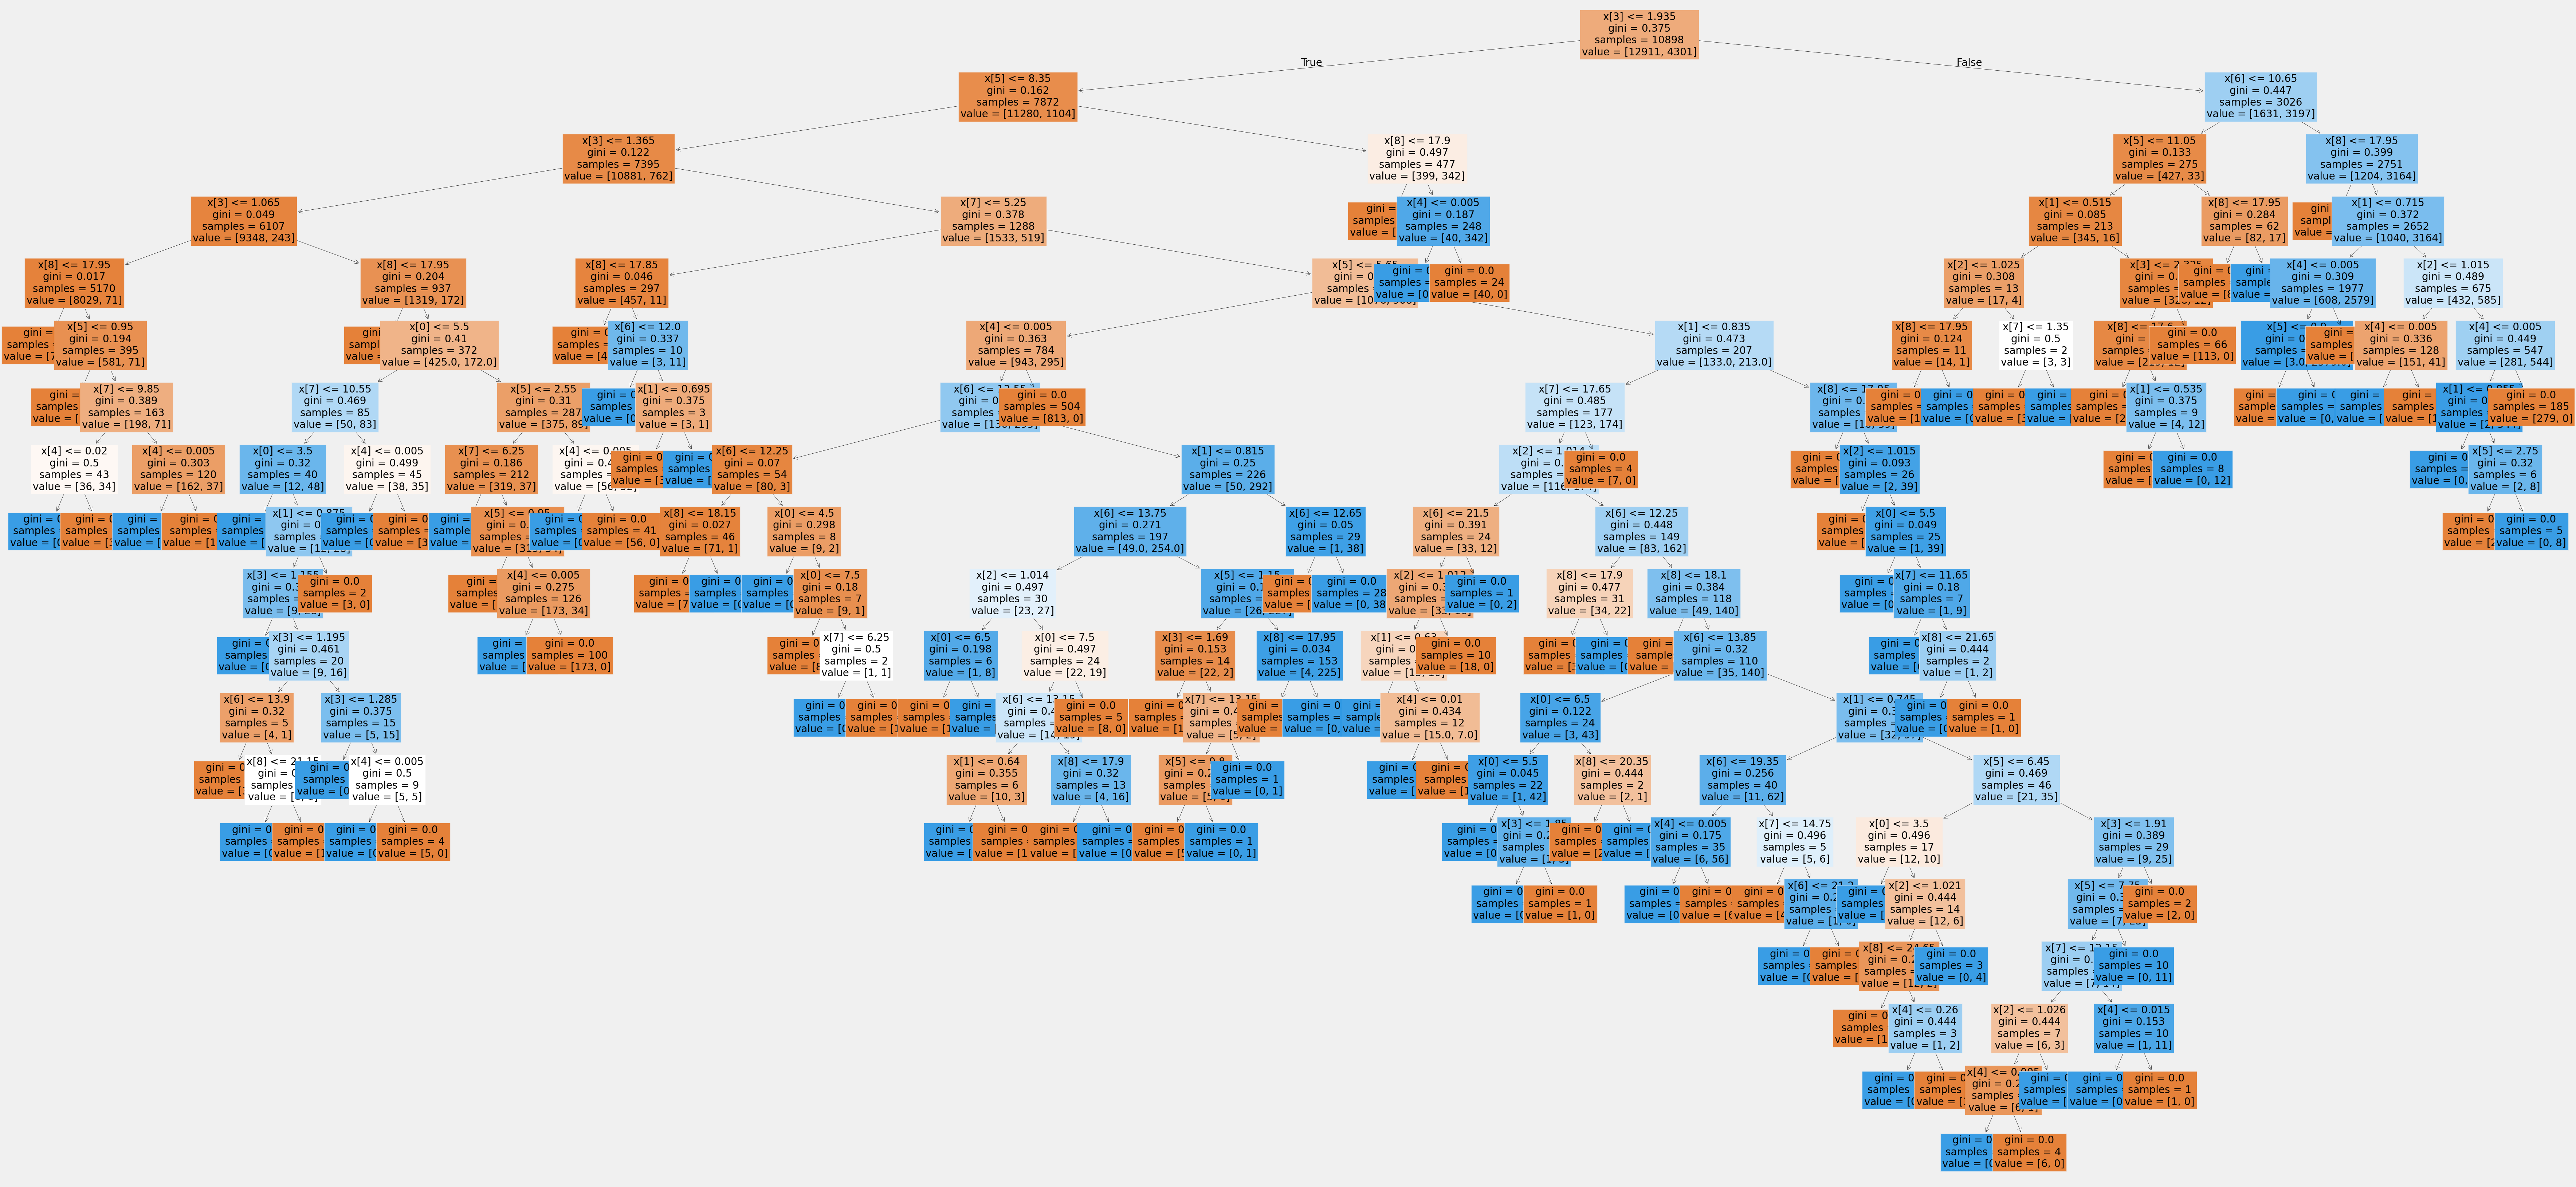

In [190]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [192]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.02268425, 0.01046224, 0.00936453, 0.10025026, 0.33901189,
       0.12259125, 0.08576189, 0.02497482, 0.28489887])

In [194]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.022684
humidity            0.010462
pressure            0.009365
global_radiation    0.100250
precipitation       0.339012
sunshine            0.122591
temp_mean           0.085762
temp_min            0.024975
temp_max            0.284899
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


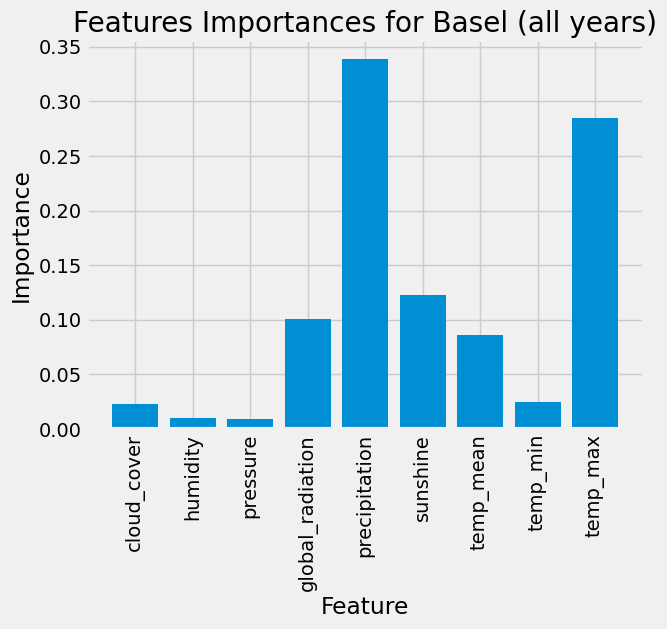

In [196]:
# Plot the results

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Basel (all years)');

plt.show()